In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
path = r"D:\Gemy Study\Course_Data Science\Session_33\Telco-Customer-Churn.csv"
df = pd.read_csv(path)
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(columns=['customerID'], inplace=True)

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


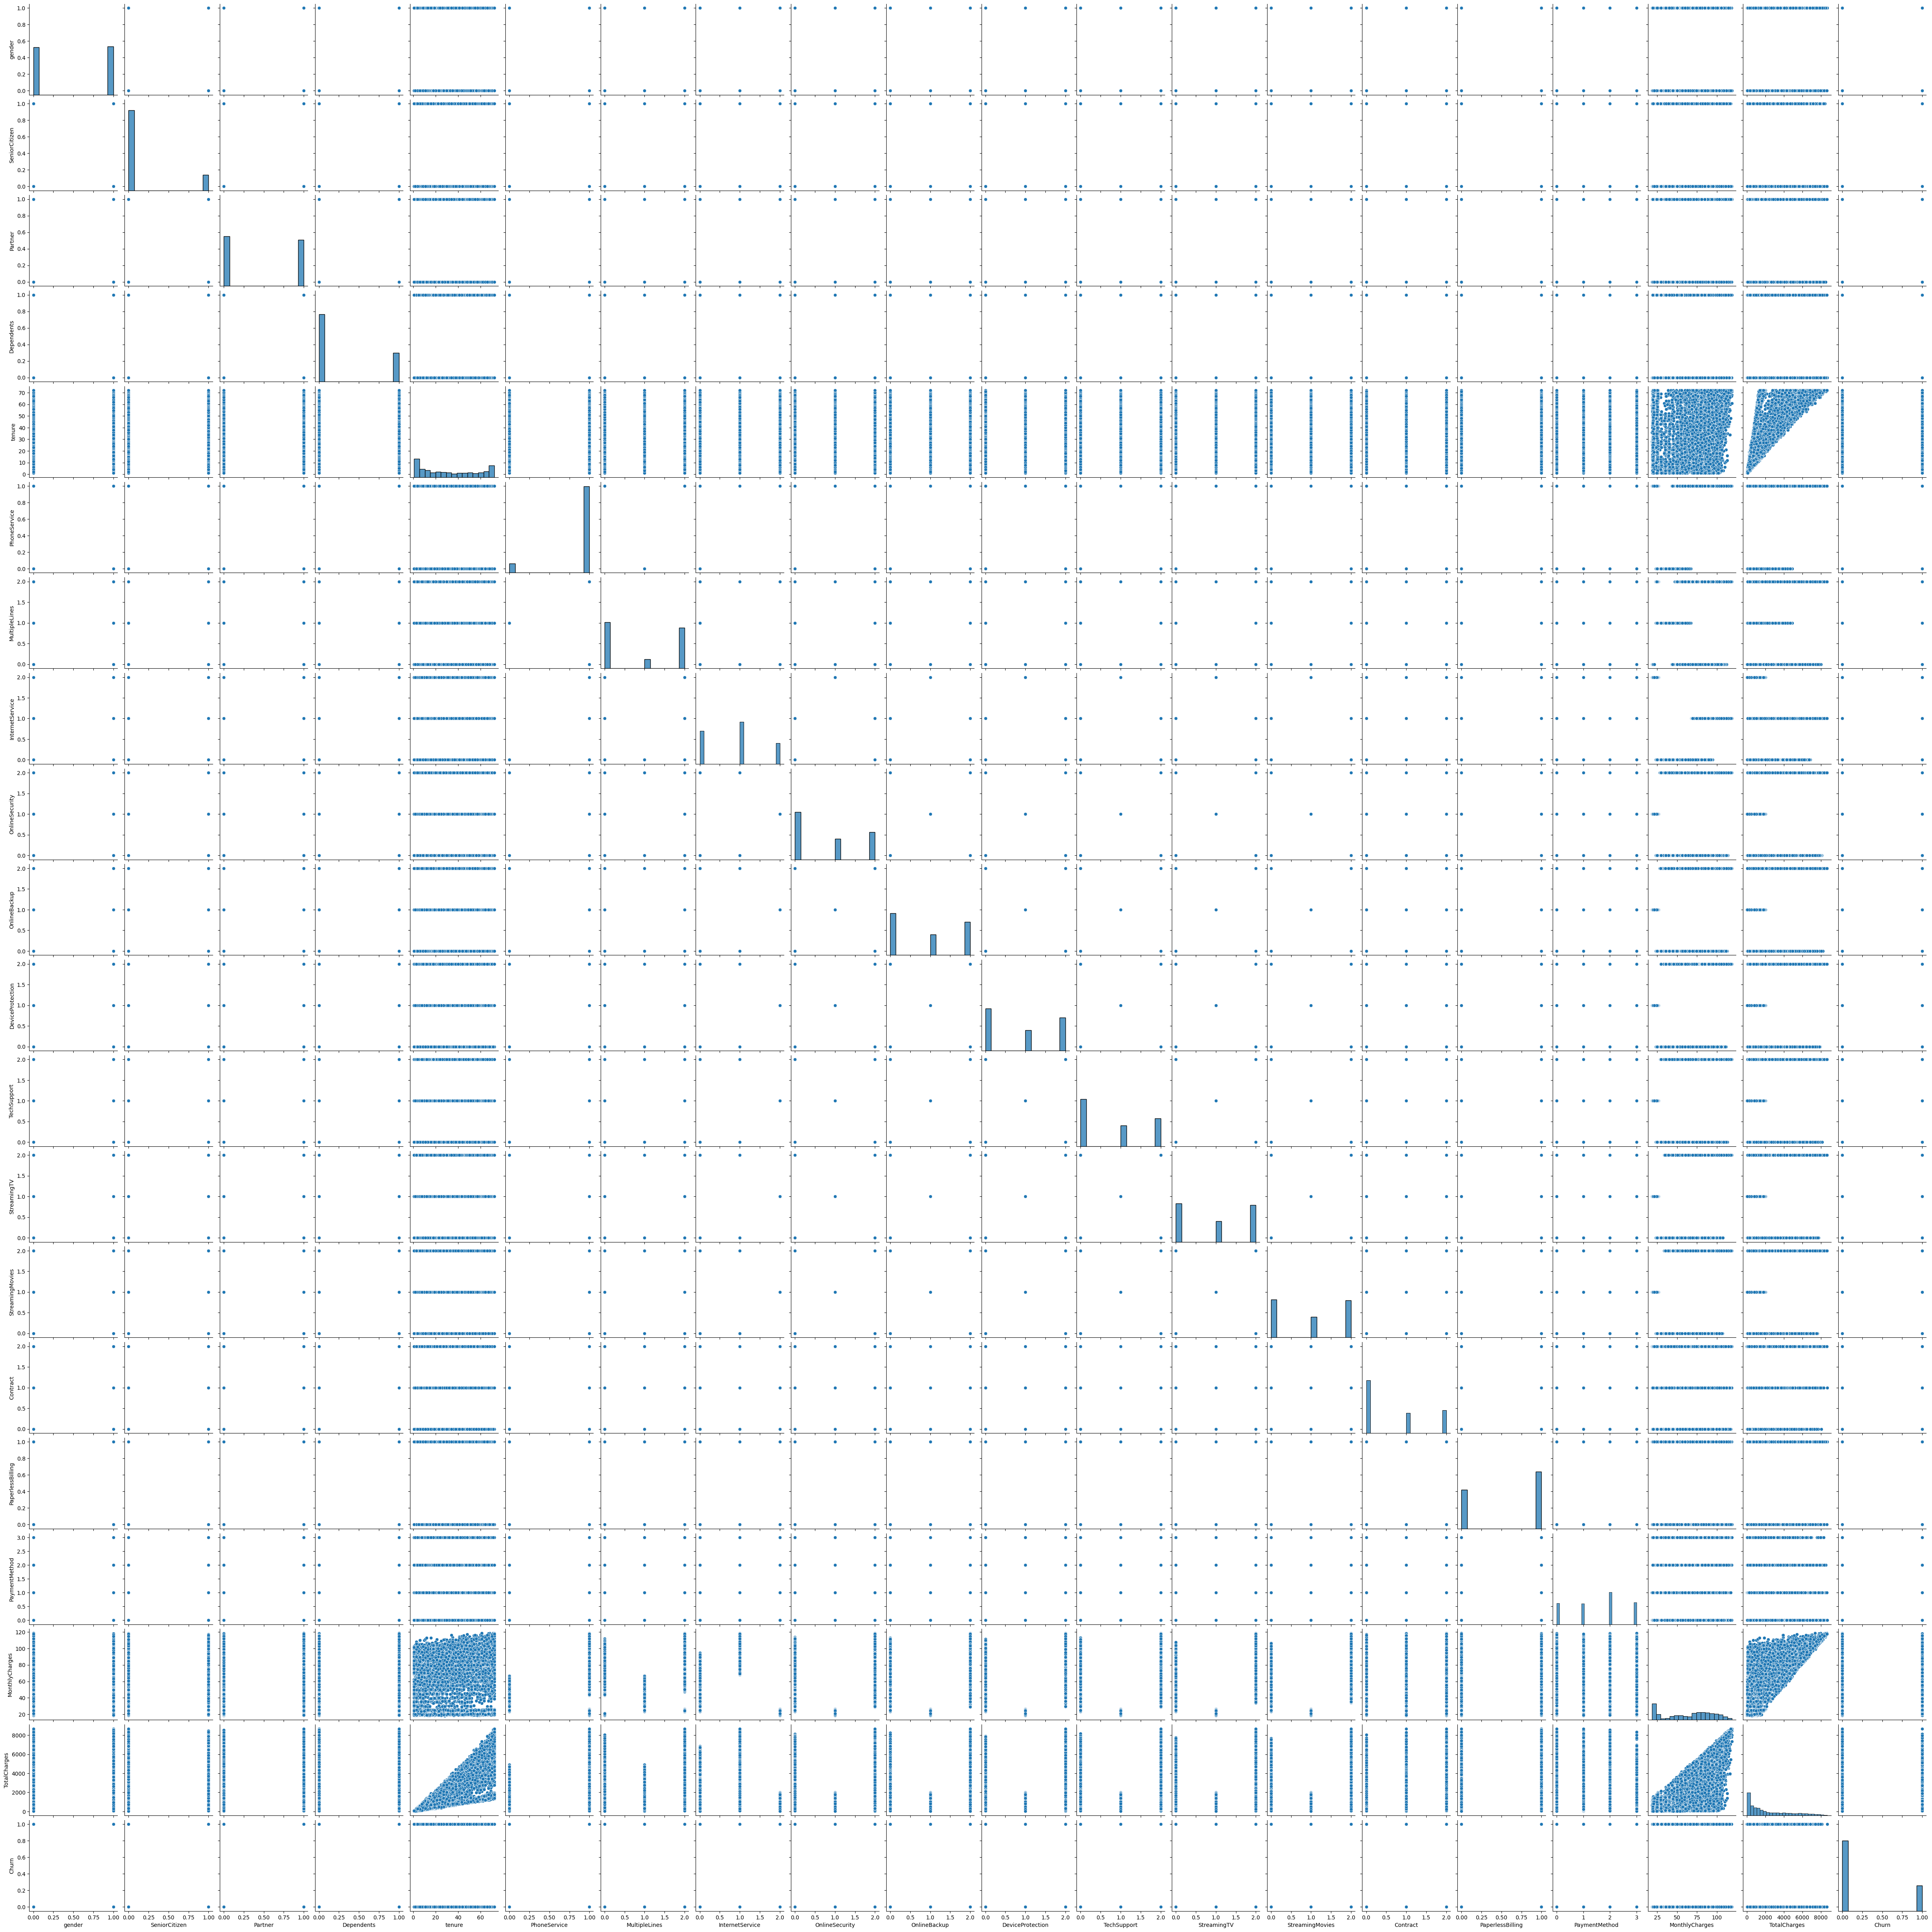

In [14]:
sns.pairplot(df)
plt.show()

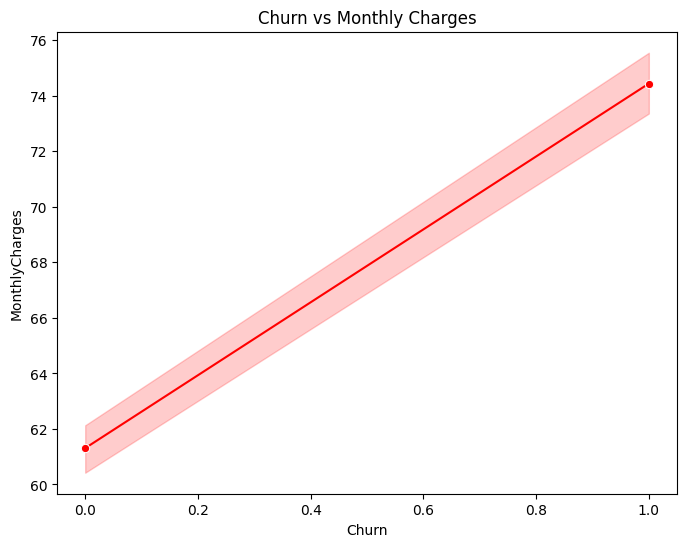

In [15]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="Churn", y="MonthlyCharges", data=df, marker="o", color="red")
plt.title("Churn vs Monthly Charges")
plt.show()

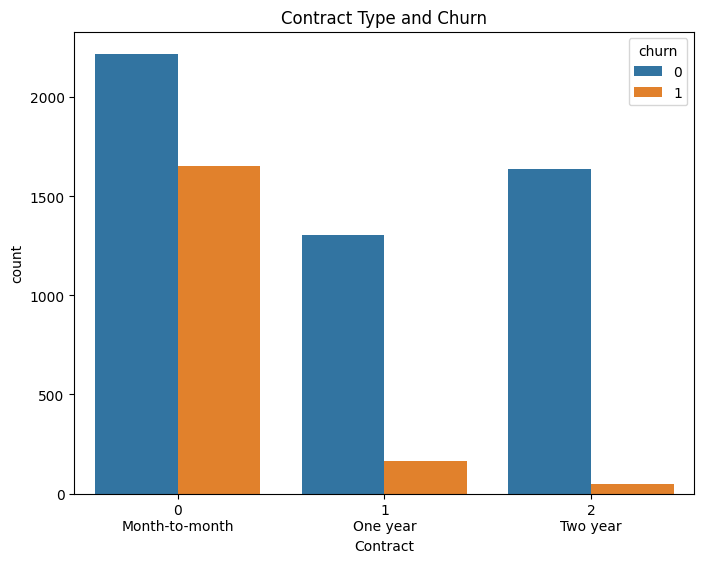

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type and Churn")
plt.xticks(ticks=[0, 1, 2], labels=["0\nMonth-to-month", "1\nOne year", "2\nTwo year"])
plt.legend(title="churn")
plt.show()

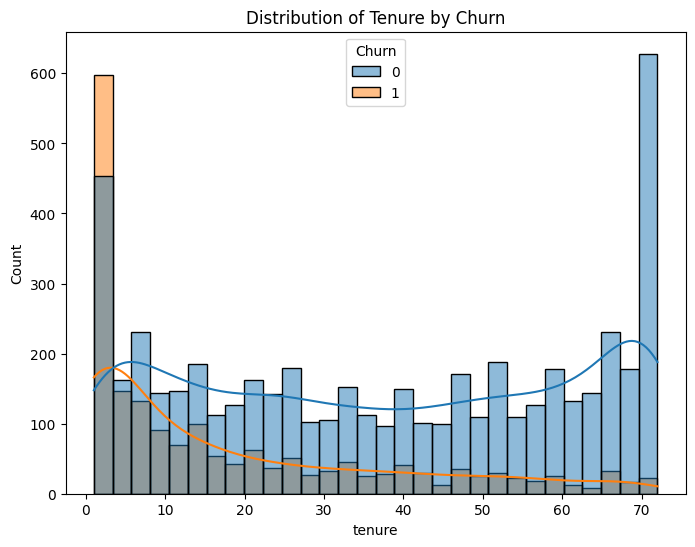

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Distribution of Tenure by Churn")
plt.show()

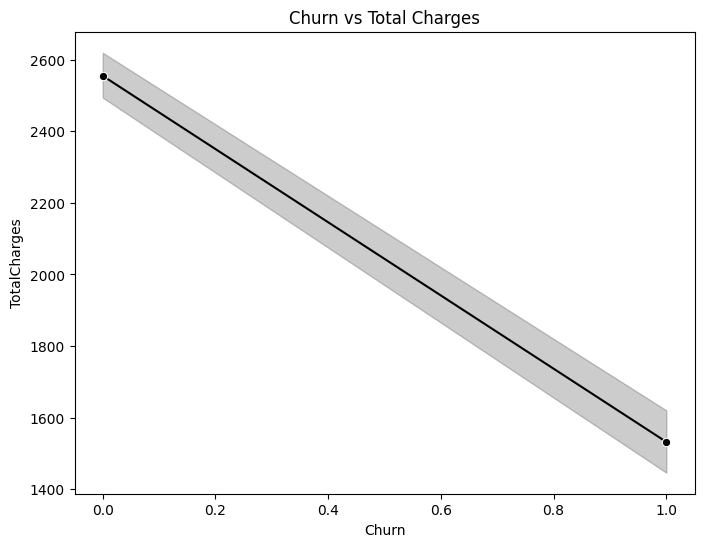

In [18]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="Churn", y="TotalCharges", data=df, marker="o", color="black")
plt.title("Churn vs Total Charges")
plt.show()

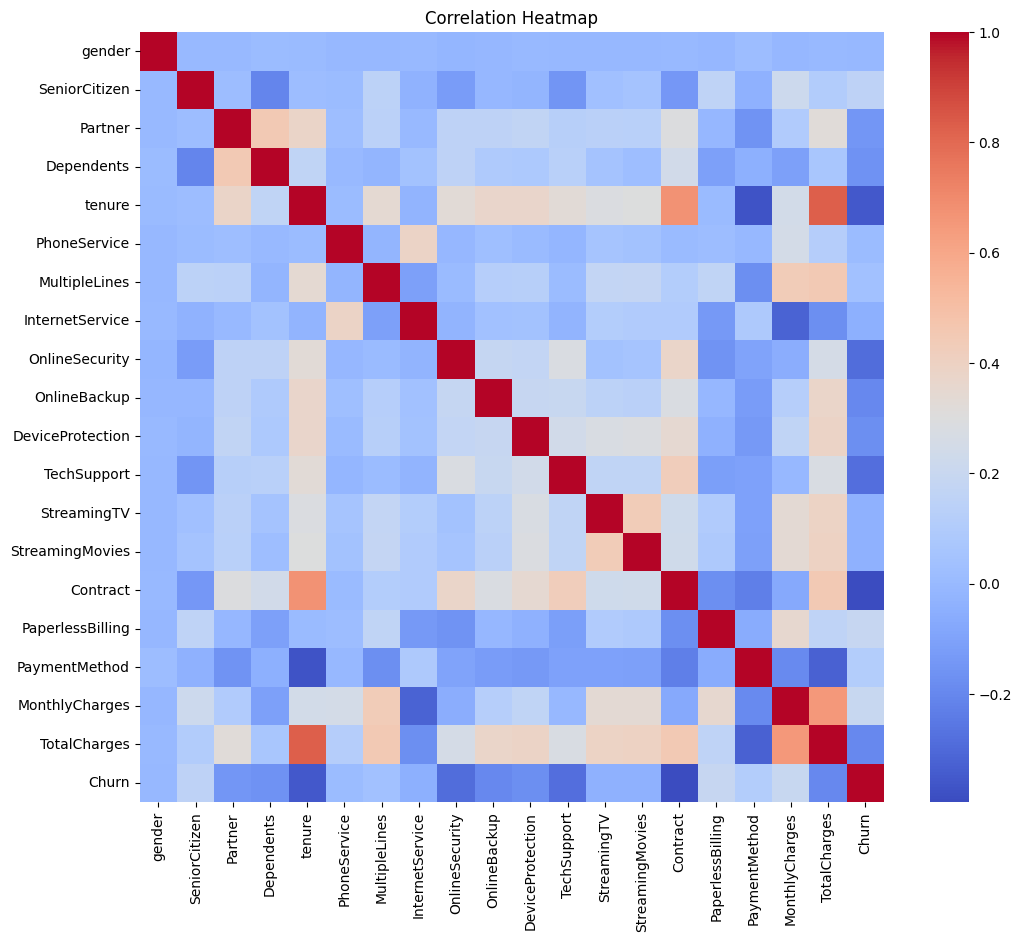

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
x = df[['Contract','TotalCharges','tenure','MonthlyCharges','InternetService','PaymentMethod','SeniorCitizen','DeviceProtection','TechSupport','OnlineSecurity']]
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [22]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logistic))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_logistic)) 
print("Classification report:\n ",classification_report(y_test, y_pred_logistic))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_logistic))
print("R2 Score: ", r2_score(y_test, y_pred_logistic))

Logistic Regression Accuracy:  0.7796730632551528
Confusion matrix:
 [[911 122]
 [188 186]]
Classification report:
                precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Mean Squared Error:  0.22032693674484718
R2 Score:  -0.12897381076869685


In [23]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_svm))
print("Classification report:\n ",classification_report(y_test, y_pred_svm))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_svm))
print("R2 Score: ", r2_score(y_test, y_pred_svm))

SVM Accuracy:  0.7839374555792467
Confusion matrix:
 [[938  95]
 [209 165]]
Classification report:
                precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407

Mean Squared Error:  0.21606254442075337
R2 Score:  -0.1071227047538188


In [24]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_knn))
print("Classification report:\n ",classification_report(y_test, y_pred_knn))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_knn))
print("R2 Score: ", r2_score(y_test, y_pred_knn))

SVM Accuracy:  0.7647476901208244
Confusion matrix:
 [[896 137]
 [194 180]]
Classification report:
                precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.48      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407

Mean Squared Error:  0.23525230987917556
R2 Score:  -0.2054526818207698


this additional 

In [25]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train, y_train) 
y_pred_tree = decision_tree_model.predict(x_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_tree))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_tree))
print("Classification report:\n ",classification_report(y_test, y_pred_tree))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_tree))
print("R2 Score: ", r2_score(y_test, y_pred_tree))

Decision Tree Accuracy:  0.7356076759061834
Confusion matrix:
 [[839 194]
 [178 196]]
Classification report:
                precision    recall  f1-score   support

           0       0.82      0.81      0.82      1033
           1       0.50      0.52      0.51       374

    accuracy                           0.74      1407
   macro avg       0.66      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407

Mean Squared Error:  0.26439232409381663
R2 Score:  -0.35476857292243635


In [26]:
# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)
y_pred_forest = random_forest_model.predict(x_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_forest))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_forest))
print("Classification report:\n ",classification_report(y_test, y_pred_forest))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_forest))
print("R2 Score: ", r2_score(y_test, y_pred_forest))

Random Forest Accuracy:  0.7796730632551528
Confusion matrix:
 [[917 116]
 [194 180]]
Classification report:
                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Mean Squared Error:  0.22032693674484718
R2 Score:  -0.12897381076869685
